<h1>Introduction and Instructions:</h1><br>
<h4>Hi There!!</h4>
<br><h4>This is the Instabot part 2- An instagram bot which will scrape some important information for you!!!</h4><br>
<h2>Following are some points which are worth reading before you look forward to run this program/notebook</h2><br>
<li>Just run the complete code once. Do not run each Cell separatly</li>
<li>Let the driver window run in maximised mode. Do not run it in windowed mode(It will maximise by itself)</li>
<li>Do not make any changes in the code except the SAMPLE_USERNAME and SAMPLE_PASSWORD. you can easily change them by refering the code below.</li>
<li>This code is written and tested with 4G network(AIRTEL). if you are using a 3G connection, you might want to change the time gap between several Cells(at the end of some cells there is a line of code whose parameters you might want to alter.</li>
<li>Sometimes you will feel like the website is frozen. No! Its not. The code is still running doing its work. You will notice this specially when this information from a instagram video is being scrapped.</li>
<br/>
<br/>
<b>Note:</b> 
Sometimes Instagram changes their tag, class names, roles, etc. That's why XPATHs are sometimes changed and at that time this bot is never able to find these XPATHs. So, if you face any problem or error in this code then feel free to change the XPATH'S
<br/>
<br/>
<br/>
<br/>

# Objective
#### 1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
    1. From the list of instagram handles you obtained when you searched 'food in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
    2. Now Find the number of posts these handles have done in the previous 3 days.
    3. Depict this information using a suitable graph.
#### 2. Your friend also needs a list of hashtags that he should use in his posts.
    1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
    2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
    3. Create a csv file with two columns: the word and its frequency
    4. Now, find the hashtags that were most popular among these bloggers
    5. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.
#### 3. You need to also calculate average followers: likes ratio for the obtained handles.
#### Followers: Likes ratio is calculated as follows:
    1. Find out the likes of the top 10 posts of the 5 handles obtained earlier.
    2. Calculate the average likes for a handle.
    3. Divide the average likes obtained from the number of followers of the handle to get the average followers like ratio of each handle.
    4. Create a bar graph to depict the above obtained information.

In [63]:
#importing important modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
import time
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from datetime import datetime, timedelta
from matplotlib import cm

In [2]:
## Username & Password
username = "SAMPLE USERNAME"        ## fill it eg: SAMPLE USERNAME
password = "SAMPLE PASSWORD"        ## fill it eg: SAMPLE PASSWORD

In [3]:
#setting up driver
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
driver.maximize_window()

In [4]:
## opening site
site = "https://www.instagram.com/"
driver.get(site)

# All Common Functions for this Program

## Searching And Opening Profiles Function

In [5]:
## function for search_open the profile

def search_open(driver, profile):
    
    open_ = True
    
    wait = WebDriverWait(driver, 10)       ## Explicit Wait
    
    try:
        driver.get(f"https://www.instagram.com/{profile}/")
        
    except Exception:
        open_ = False
        
    return open_


## Profile Closing Function

In [6]:
## function for closing profile or returning home page

def close_profile(driver):
    
    wait = WebDriverWait(driver, 10)
    home = wait.until(EC.element_to_be_clickable((By.XPATH, '//div/div/div[2]/div/div/div[1]/div[2]/div/div[1]/div/div/div/div/div[2]/div[1]/div/span/div/a')))
    # home.click()
    # we are Useing JavaScript click because normal click doesn't work in this case
    driver.execute_script("arguments[0].click();", home)

# 1. Log in to Instagram Handle

In [7]:
## function for log in

def remove_notification(driver, wait):
    ## Notifination popup setting up not now, if occur
    time.sleep(3)
    
    driver.get(site)
    
    try:
        popup_path = '/html/body/div/div[1]/div/div[2]/div/div/div/div/div[2]/div/div/div[3]/button[2]'
#         /html/body/div[4]/div[1]/div/div[2]/div/div/div/div/div[2]/div/div/div[3]/button[2]
        not_now_btn = wait.until(EC.visibility_of_element_located((By.XPATH, popup_path)))
        not_now_btn.click()
    except TimeoutException:
        print("Timeout while waiting for the notification popup.")
    except NoSuchElementException:
        print("Notification popup not found.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

def log_in_to_account(driver, username, password):
    
    time.sleep(3)
    
    login = True
    
    wait = WebDriverWait(driver, 10)  ## explicit wait
    
    try:

        ## enter username
        username_ = wait.until(EC.presence_of_element_located((By.XPATH,"//*[@id='loginForm']/div/div[1]/div/label/input")))
        username_.send_keys(username)

        ## enter password
        password_ = wait.until(EC.presence_of_element_located((By.XPATH,"//*[@id='loginForm']/div/div[2]/div/label/input")))
        
        password_.send_keys(password)

        ## click login
        log_in_path = '/html/body/div[2]/div/div/div[2]/div/div/div[1]/section/main/article/div[2]/div[1]/div[2]/form/div/div[3]/button'
        log_in = wait.until(EC.presence_of_element_located((By.XPATH,log_in_path)))
        log_in.submit()

        time.sleep(3)  ## waiting for website to switch
        
    except Exception:
        login = False
        
    if login:
        remove_notification(driver, wait)
    
    return login

## 1

login = log_in_to_account(driver, username, password)
if login:
    print("log in successfully")
else:
    print("log in unseccussful, give one more try")

log in successfully


# (1.1) 

# Re-Scraping the instagram handles which will appear on typing "Food" in the search bar / And TakingTop 10 / printing top 5 from this top 10

## Searching Food & extracting related users 

In [8]:
## function to search something string like 'food' here

def Search_Handle(driver, string):
    
    driver.get(site)
    wait = WebDriverWait(driver, 10)       ## Explicit Wait
    
    ## search 'food'
    search_path = "//div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div/div/div[2]/div[2]/span/div/a"
    search_btn = wait.until(EC.presence_of_element_located((By.XPATH,search_path)))
    search_btn.click()
        
    search_path = "//div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[1]/div/div/input"
    search_bar = wait.until(EC.presence_of_element_located((By.XPATH,search_path)))
    search_bar.clear()
    search_bar.send_keys(string)
    
    time.sleep(3)

    ## Extracting the handles
    handles = []
    
    xpath = "//div[contains(@class, 'x9f619 x78zum5 xdt5ytf')]/a/div/div/div/div[2]/div/div/div/span"
    elements2 = wait.until(EC.presence_of_all_elements_located((By.XPATH, xpath)))
    print("Total List size", len(elements2))
    
    for i in range(len(elements2)):
        handles.append(elements2[i].text)
        
    return handles

## extracting users followers sizes and printing top 5

In [9]:
## 2

wait = WebDriverWait(driver, 30)
string = "food"     ## can be changed
users = Search_Handle(driver, string)

followers={}

# extracting per user followers size
for user in users[:10]:
    
    # opening the user profile
    search_open(driver, user)
    
    path = f'//a[contains(@href, "/{user}/followers/")]/span[contains(@class, "_ac2a")]'
    followers_size_path = wait.until(EC.presence_of_element_located((By.XPATH, path)))
    followers_size = followers_size_path.get_attribute('title')
    followers[user] = (int(followers_size.replace(",", "")))

Total List size 47


In [11]:
##3

top_10_users = sorted(followers.items(), key = lambda item: item[1], reverse=True)

for i in range(5):
    candidate = top_10_users[i]
    print(f"{i+1}. {candidate[0]} --> {candidate[1]}")

1. myfoodbyhilda --> 1213994
2. foodblogafrica --> 621341
3. foodblog9ja --> 567881
4. foodace --> 503559
5. mykitchen_lagos --> 291734


# (1.2) 
# Finding the number of posts these handles have done in the previous 3 days.

In [31]:
#iterating through the list of top 5 users with maximum followers
#and counting the number of posts they have done in past 3 days
wait = WebDriverWait(driver, 10)

date = None

top_5_users = top_10_users[:5]
no_of_posts=[]

for user in top_5_users:
    user = user[0]
    
    time.sleep(3)
    print(user, end=': ')
    
    # opening the user profile
    search_open(driver, user)
    
    # Get today's date in UTC
    today = datetime.utcnow()
    
    count = 0
    
    path = "//div[contains(@class,'x1lliihq x1n2onr6 xh8yej')]"
    btn = wait.until(EC.presence_of_all_elements_located((By.XPATH,path)))
    
    for i in btn:
        
        i.click()
        
        path = '//time'
        upload_date = wait.until(EC.presence_of_element_located((By.XPATH, path)))
        time_string = upload_date.get_attribute('datetime')        
        
        # Parse the string date into a datetime object
        date_obj = datetime.strptime(time_string, "%Y-%m-%dT%H:%M:%S.%fZ")
        
        # Calculate the difference in days
        difference = today - date_obj
        
        
        # Check if the date is within the last 3 days
        if difference <= timedelta(days=3):
            count+=1
        else:
            driver.back()
            break
        
        ## exiting the post
        driver.back()
        
        time.sleep(1)
    
    print("have done", count, "posts in past 3 days")
    no_of_posts.append(count)

myfoodbyhilda: have done 1 posts in past 3 days
foodblogafrica: have done 0 posts in past 3 days
foodblog9ja: have done 4 posts in past 3 days
foodace: have done 0 posts in past 3 days
mykitchen_lagos: have done 0 posts in past 3 days


<h1>Q1.3. Plotting Graph</h1>

In [43]:
top_10_users

[('myfoodbyhilda', 1213994),
 ('foodblogafrica', 621341),
 ('foodblog9ja', 567881),
 ('foodace', 503559),
 ('mykitchen_lagos', 291734),
 ('food', 182436),
 ('foodnetworkng', 161176),
 ('food_photosnap', 67175),
 ('_foodiesm_', 48422),
 ('food.itam', 1076)]

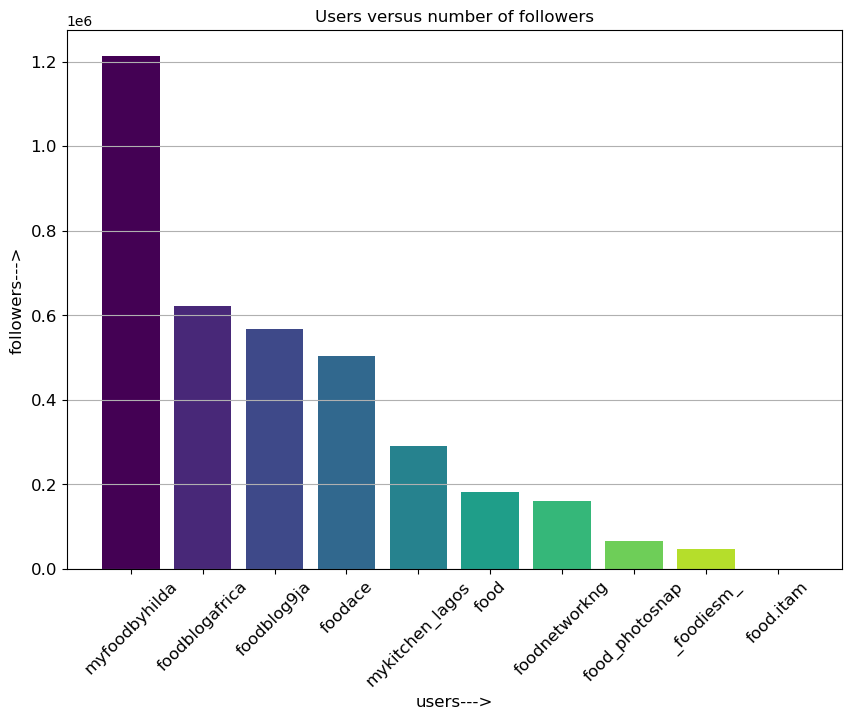

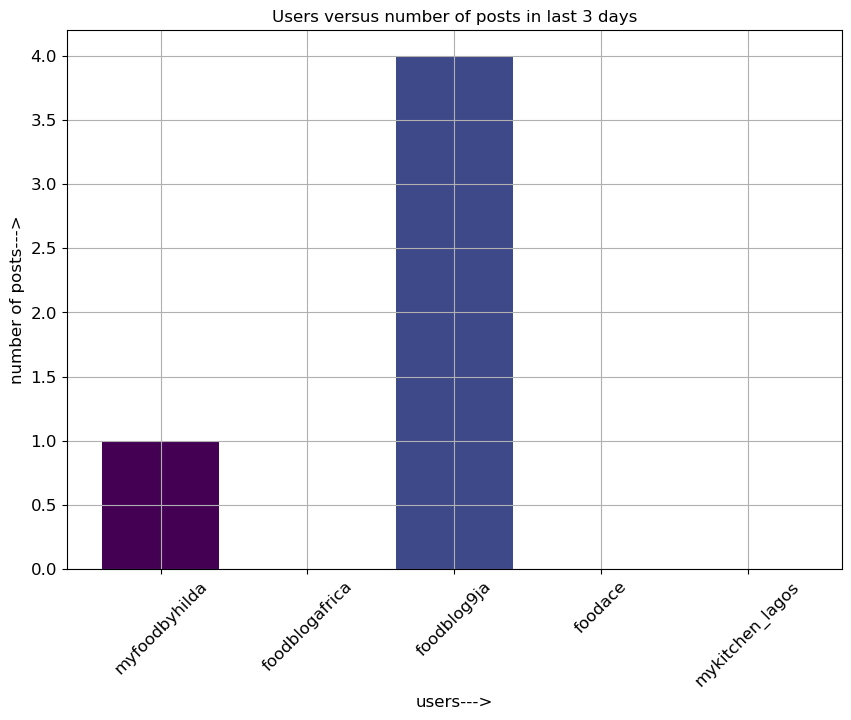

In [76]:
# important values
users_top_10, followers_top_10 = zip(*top_10_users)
users_top_5, followers_top_5 = zip(*top_5_users)
colors = cm.viridis(np.linspace(0, 1, len(users_top_10)))

#plotting a graph between those top 10 users and the number of followers
plt.figure(figsize=(10, 7))
plt.bar(users_top_10, followers_top_10, color=colors)
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
plt.title('Users versus number of followers', size=12)
plt.xlabel('users--->', size=12)
plt.ylabel('followers--->', size=12)
plt.grid(axis='y')
plt.show()

#graph between top 5 users and the number of posts
plt.figure(figsize=(10, 7))
plt.bar(users_top_5, no_of_posts, color=colors)
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
plt.title('Users versus number of posts in last 3 days', size=12)
plt.xlabel('users--->', size=12)
plt.ylabel('number of posts--->', size=12)
plt.grid()
plt.show()

# (2.1) 
# Opening the 5 handles I obtained in the last question, and scraping the content of the first 10 posts of each handle.

In [ ]:
#the idea is to visit each page and go to each of the 10 posts and scrape the content and hashtags from there and store them in the
#separate lists

wait = WebDriverWait(driver, 10)

top_5_users = top_10_users[:5]
hashtags=[]
content=[]

for user in top_5_users[:1]:
    time.sleep(3)
    user = user[0]
    
    search_open(driver, user)
    
    time.sleep(1)
    count=0
    
    path = "//div[contains(@class,'x1lliihq x1n2onr6 xh8yej')]"
    posts = wait.until(EC.presence_of_all_elements_located((By.XPATH,path)))
    
    for i in posts:
        i.click()
        
        # scaping content
        path =  '//li//div[1]/h1'
        content_div = wait.until(EC.presence_of_element_located((By.XPATH, path)))
        content.append(content_div.get_attribute('textContent'))
        
        # scaping the hashes
        path = '//div[1]/h1/a'
        all_hashes = driver.find_elements(By.XPATH, path)
        for hashes in all_hashes:
            hashtags.append(hashes.get_attribute('innerHTML'))
        
        # counting the post scaping we already done
        count+=1
        if count>=10:
            driver.back()
            break
        
        driver.back()
        time.sleep(1)
    
    # Remove all strings containing "@"
    hashtags = [hashtag for hashtag in hashtags if "@" not in hashtag]

print(*hashtags)
    
#finally i have two lists one named hashtags which contains all the hashtags. another called content, which contains all the content.

In [14]:
#this is the scrapped content of all posts

for i in content:
    print(i)
    print("-------------------------------------------------------------------------------------------------------------")

Cheese paratha @snphookahlounge made a wholesome lunch with a taste quenching all ends of my taste bud. Andeywala has a separate lounge called SNP lounge for shisha and a menu If you are looking for something different than their amazing andeywala menu. From fries to fried rice, they got it all. .Paratha wasn't in a geometric shape you expect parathas to be but that didn't take away anything from its taste. Sumptuous cheese oozing out of every bite of the paratha. Plus their garlic chutney does wonders when taken with the paratha...Looking for some fine tasteworthy food without burning a hole in your pocket?Drop by...They have a huge variety of options to try from and egglicious menu you'll love to introduce yourself to.Taste - 4/5#food#love#life#Kolkata#food#foodporn#foodloverskolkata#foodgasms#foodphotography#instafood#foodlicious#indianblogger#kolkatablogger#allaboutfood#instafood#foodie#indianfood#indianfoodbloggers#kolkatafoodguide#foodstagram#foodblogger#footfetishnation#healthyf

# (2.2. Preparing a list of all words used in all the scraped posts and calculating the frequency of each word.</h1>

In [15]:
#here in the question i am considering that "words" mean hashtags. because there will be no sense of getting the frequency of all the words in the content.
#firstly i will convert the "hashtags" list to a numpy array
hashtags=np.array(hashtags)
hash_tags=[]#it will contain all the actual hashtags, where all the usernames are filtered from the hashtags array
for i in hashtags:
    if not i[0]=='@' and i!='':
        hash_tags.append(i)
#now "hash_tags" is the actual array which we actually require so we will keep it

In [16]:
dic=dict()#this will store the frequencies of all the hashtags
for i in hash_tags:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
dic
#this is our dictionary which contains all the frequencies of the hashtags

{'#food': 27,
 '#love': 6,
 '#life': 4,
 '#Kolkata': 2,
 '#foodporn': 23,
 '#foodloverskolkata': 9,
 '#foodgasms': 10,
 '#foodphotography': 25,
 '#instafood': 17,
 '#foodlicious': 11,
 '#indianblogger': 13,
 '#kolkatablogger': 7,
 '#allaboutfood': 7,
 '#foodie': 17,
 '#indianfood': 4,
 '#indianfoodbloggers': 9,
 '#kolkatafoodguide': 10,
 '#foodstagram': 11,
 '#foodblogger': 11,
 '#footfetishnation': 2,
 '#healthyfood': 6,
 '#buzztasy': 10,
 '#delhiblogger': 11,
 '#foodblogfeed': 8,
 '#foodinstagram': 5,
 '#foodinspiration': 5,
 '#kolkatadiaries': 9,
 '#momo': 2,
 '#dimsum': 1,
 '#eeeeeats': 4,
 '#indianfoodie': 7,
 '#foodtalkindia': 2,
 '#lbbkolkata': 2,
 '#foodintheair': 5,
 '#momos': 2,
 '#kolkatagram': 5,
 '#eggslut': 1,
 '#chinesefood': 8,
 '#kolkatasutra': 4,
 '#cityofjoy': 1,
 '#streetfood': 2,
 '#indianstreetfood': 5,
 '#foodiesofinstagram': 2,
 '#bangaloreblogger': 1,
 '#bangalorediaries': 1,
 '#bangalorefoodies': 1,
 '#bangalore': 1,
 '#lbbbangalore': 1,
 '#chinese': 1,
 '#del

<h1>Q2.3. Creating a csv file with two columns : the word and its frequency</h1>

In [17]:
hash_word=np.array([i[1:] for i in dic.keys()])
frequency=np.array([i for i in dic.values()])
df=pd.DataFrame()
df['Words']=hash_word
df['Frequency']=frequency
df.to_csv('Hashtag_Frequencies.csv')
#hence the file is saved in the working directory

<h1>Q2.4. Finding the hashtags that were most popular among these bloggers</h1>

In [18]:
#we have the two arrays named hash_word and frequency.
#we will first arrange them in descending order and then print the hashtags that were most popular among them.

In [19]:
hash_word=hash_word[np.argsort(frequency)][::-1]
frequency=frequency[np.argsort(frequency)][::-1]
for i in range(len(hash_word)):
    print(hash_word[i], "----->", frequency[i], "times")

food -----> 27 times
foodphotography -----> 25 times
foodporn -----> 23 times
foodie -----> 17 times
instafood -----> 17 times
indianblogger -----> 13 times
delhifoodblogger -----> 12 times
delhiblogger -----> 11 times
foodblogger -----> 11 times
foodstagram -----> 11 times
foodlicious -----> 11 times
foodswerve -----> 10 times
buzztasy -----> 10 times
kolkatafoodguide -----> 10 times
foodgasms -----> 10 times
like4likes -----> 10 times
buzzfeastfood -----> 9 times
sokolkata -----> 9 times
thegreatindianfoodie -----> 9 times
foodloverskolkata -----> 9 times
foodfreaks_jpr -----> 9 times
kolkatadiaries -----> 9 times
mumbaistreetfood -----> 9 times
kolkatabuzz -----> 9 times
indianfoodbloggers -----> 9 times
kolkatafoodblogger -----> 9 times
instagram -----> 8 times
foodlover -----> 8 times
chinesefood -----> 8 times
foodblogfeed -----> 8 times
buzzfeedfood -----> 8 times
instagood -----> 8 times
indianfoodie -----> 7 times
FoodTalkindia -----> 7 times
allaboutfood -----> 7 times
kolkat

<h1>Q2.5. Plotting a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.</h1>

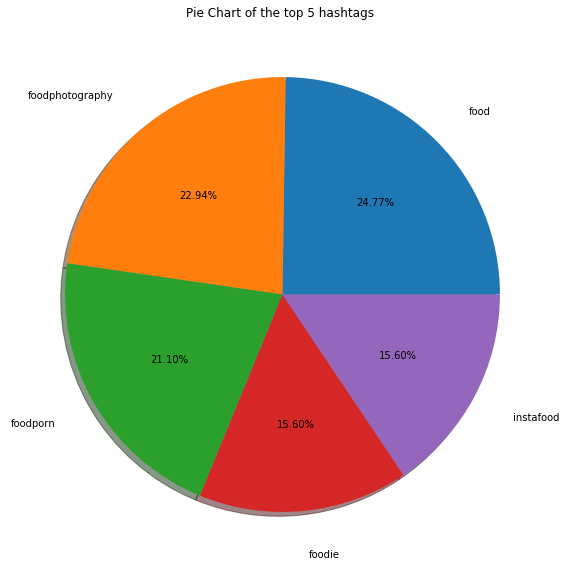

In [20]:
x=hash_word[:5]
y=frequency[:5]
plt.figure(figsize=(10, 10))
plt.pie(y, labels=x, autopct='%.2f%%', shadow=True, labeldistance=1.2)
plt.title('Pie Chart of the top 5 hashtags ')
plt.show()

<h1>Q3.1. Finding out the likes of the top 10 posts of the 5 handles obtained earlier.</h1>

In [21]:
like=[]
for user in top5:
    print(user, end="----> ")
    time.sleep(3)
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(user)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//span[@class='Ap253']")))
    driver.find_element_by_xpath('//span[@class="Ap253"]').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_9AhH0"]')))
    time.sleep(1)
    count=0
    likes=0
    for i in driver.find_elements_by_xpath('//div[@class="_9AhH0"]'):
        i.click()
        #clicks on the post of the user being iterated.
        try:
            WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//div[@class="Nm9Fw"]/button[contains(@class, "_0mzm-")]/span')))
            likes+=int("".join(driver.find_element_by_xpath('//div[@class="Nm9Fw"]/button[contains(@class, "_0mzm-")]/span').get_attribute('innerHTML').split(',')))
        except TimeoutException:
            WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "HbPOm")]/span[contains(@class, "vcOH2")]/span')))
            likes+=int("".join(driver.find_element_by_xpath('//div[contains(@class, "HbPOm")]/span[contains(@class, "vcOH2")]/span').get_attribute('innerHTML').split(',')))
        count+=1
        if count>=10:
            driver.back()
            break
        driver.back()
        time.sleep(1)
    print("total", likes, "likes on 10 latest posts")
    like.append(likes)

foodandkhan----> total 1389 likes on 10 latest posts
the_foodie_moody----> total 619 likes on 10 latest posts
foodfreaks_jpr----> total 1205 likes on 10 latest posts
the_tipsy_foodie----> total 5033 likes on 10 latest posts
foodswerve----> total 5427 likes on 10 latest posts


In [22]:
top5=np.array(top5)
top5

array(['foodandkhan', 'the_foodie_moody', 'foodfreaks_jpr',
       'the_tipsy_foodie', 'foodswerve'], dtype='<U16')

In [23]:
like=np.array(like)
#likes on the top 10 posts for those 5 users
like

array([1389,  619, 1205, 5033, 5427])

In [24]:
followers[0:5]
#followers of those 5 users

array([60900,  5315,  1476,  1474,  1317])

<h1>Q3.2. Calculating the average likes for a handle.</h1>

In [25]:
average_likes=like/10
average_likes
#these are the average likes of the respective 5 users.

array([138.9,  61.9, 120.5, 503.3, 542.7])

<h1>Q3.3. Dividing the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle</h1>

In [26]:
#for getting average followers to likes ratio
ratio=followers[0:5]/average_likes
ratio

array([438.44492441,  85.86429725,  12.24896266,   2.92867077,
         2.42675511])

<h1>Q3.4. Creating a bar graph to depict the above obtained information.</h1>

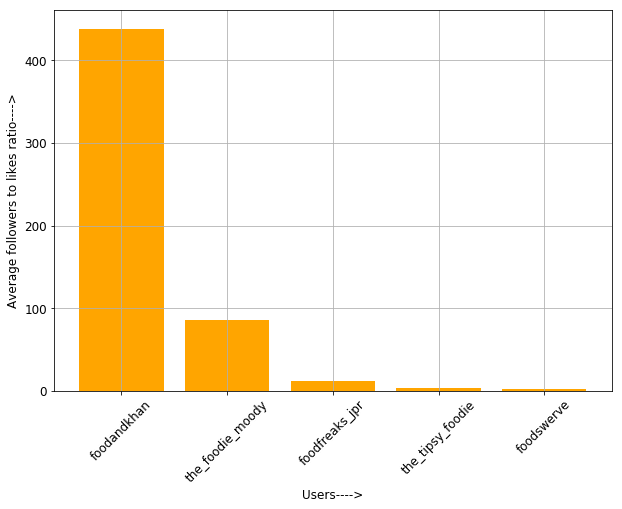

In [27]:
#plotting the graph between average followers to the likes ratio and users.
plt.figure(figsize=(10,7))
plt.bar(top5, ratio, color='orange')
plt.xticks(rotation=45, size=12)
plt.xlabel('Users---->', size=12)
plt.ylabel('Average followers to likes ratio---->', size=12)
plt.yticks(size=12)
plt.grid()
plt.show()